In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subscriptions.info()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

##### Приведем столбец, содержащий дату в датафрейме rides, к формату Datetime

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

##### В датафрейме rides на основе столца 'date' создадим столбец 'month', содержащий номер месяца.

In [7]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

##### Проверим датафреймы на наличие дупликатов, удалим их, если есть.

In [8]:
users.duplicated().sum()

31

In [9]:
users.drop_duplicates(inplace=True)

In [10]:
rides.duplicated().sum()

0

In [11]:
subscriptions.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [12]:
cities = users.pivot_table(index='city', values='user_id', aggfunc = 'count')
cities.columns = ['count']
cities.sort_values(by='count', ascending=False, inplace=True)
cities.describe()

,count
count,8.000000
mean,191.750000
std,15.672998
min,168.000000
25%,182.250000
50%,191.000000
75%,199.500000
max,219.000000


In [13]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

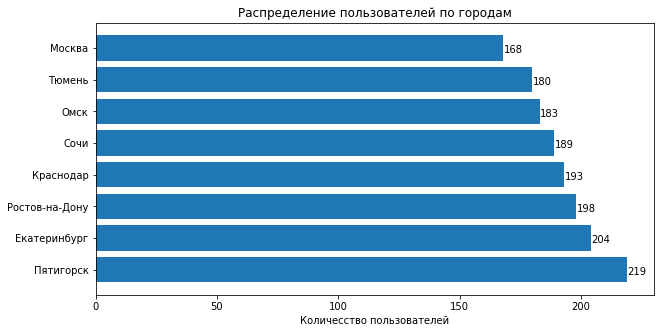

In [14]:
xs = cities.index
ys = cities['count']

plt.figure(figsize=(10,5));
plt.barh(xs,ys)

for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, 
                 (y,x), 
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='center')
plt.title('Распределение пользователей по городам')
plt.xlabel('Количесство пользователей');

Всего в выборке представлено 8 городов.   
В среднем по 191 уникальному пользователю на город, с наибольшим количеством в Пятигорске (219).

##### Соотношение пользователей с подпиской и без подписки

free     835
ultra    699
Name: subscription_type, dtype: int64

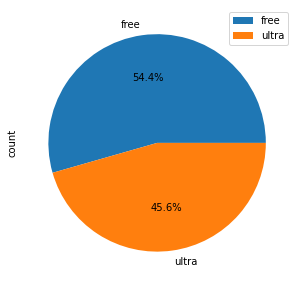

In [15]:
tariff_data = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
tariff_data.columns = ['count']
tariff_data.plot(y='count', kind='pie', figsize=(5,5), autopct='%1.1f%%');
users['subscription_type'].value_counts()

Всего в выборке представлено 1534 уникальных пользователей, из которых 835 (54.4%) без подписки, и 699 (45.6%) с подпиской.

##### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

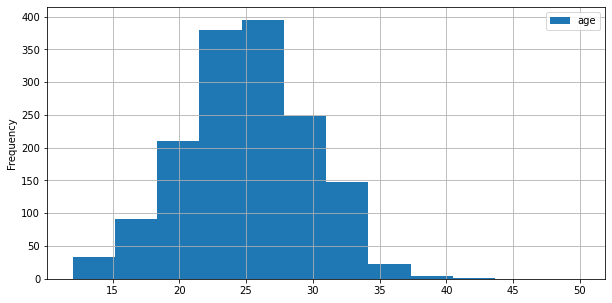

In [16]:
users.plot(y = 'age', kind = 'hist', bins = 12, grid=True, figsize = (10,5), range = (12,50))
users['age'].describe()

Средний возраст пользователя - 24.9 лет, медианный - 25 лет.   
График возраста пользователей напоминает график нормального распределения на отрезке от 18 до 75 лет с пиком на значении 25 лет. 

##### Расстояние поездок

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

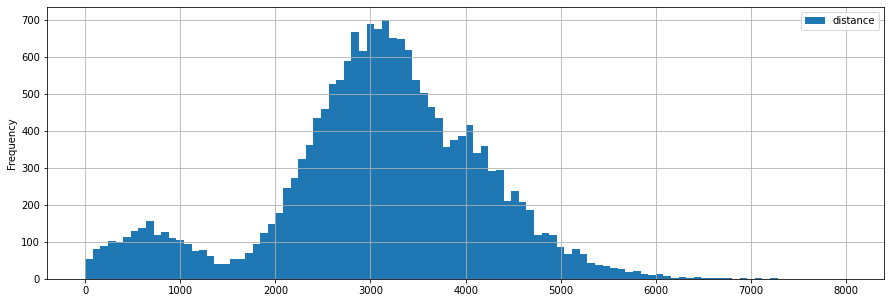

In [17]:
rides.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (15,5), range = (0,8000))
rides['distance'].describe()

Среднее расстояние поездки - 3071 метр.  
Медианное расстояние поездки - 3134 метра.  
На графие определяются два пика значений: первый (слабовыраженный по сравнению со вторым) - на уровне около 700 метров; второй - на уровне около 3000 метров.  
Большинство значений укладываются в диапазон 0-6000 метров.

##### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

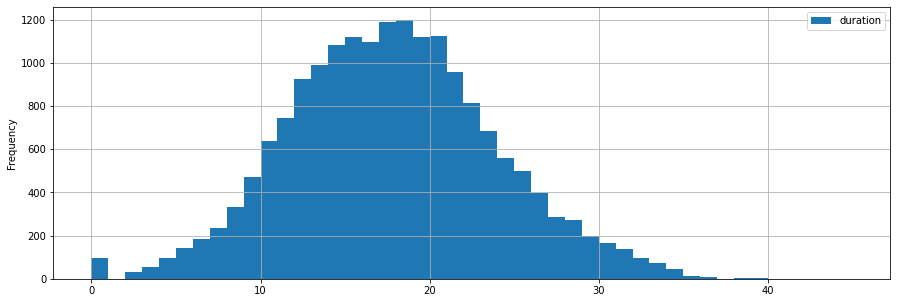

In [18]:
rides.plot(y = 'duration', kind = 'hist', bins = 45, grid=True, figsize = (15,5), range = (0,45))
rides['duration'].describe()

Рассмотрим отдельно поездки, длительностью до минуты.

In [19]:
rides.query('duration < 1')['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

В выборке поездок менее минуты минимальное расстояние поездки - 4030 метров, при среднем в 5113 метров. Это явные аномалии, удалим их из выборки.

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

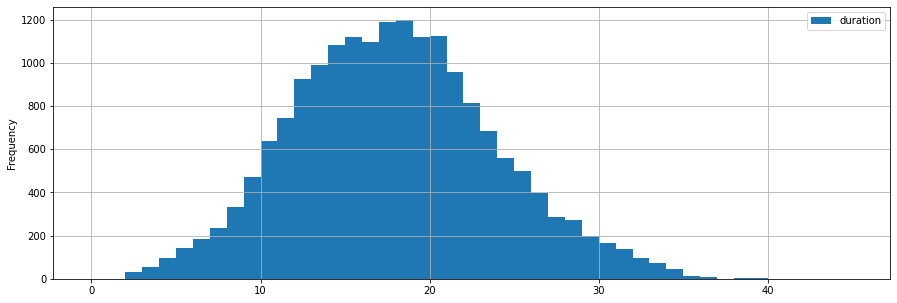

In [20]:
rides = rides.query('duration > 1')
rides.plot(y = 'duration', kind = 'hist', bins = 45, grid=True, figsize = (15,5), range = (0,45))
rides['duration'].describe()

Среднее время поездки - 17.9 минут.  
Медианное время поездки - 17.7 минут.   
График напоминает нормальное распределение с пиком около 18 минут.  
Большинство значений укладываются в диапазон 1-35 минут. Максимальное значение - 40.8 минут.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм (data)

In [21]:
data = rides.merge(users, on='user_id', how='right')
data = data.merge(subscriptions, on='subscription_type', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   name               17973 non-null  object        
 6   age                17973 non-null  int64         
 7   city               17973 non-null  object        
 8   subscription_type  17973 non-null  object        
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [22]:
data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

##### Из датафрейма data создадим два датафрейма:  ultra - с данными о пользователях с подпиской, smart - с данными о пользователях без подписки.

In [23]:
ultra = data.query('subscription_type == "ultra"')
free = data.query('subscription_type == "free"')

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

###### Расстояние поездки

In [24]:
ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Расстояние поездки у пользователей с подпиской :  
-среднее (3115 метров), медианное (3149 метров).

In [25]:
free['distance'].describe()

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

Расстояние поездки у пользователей без подписки:  
-среднее (3028 метров), медианное (3102 метрa).

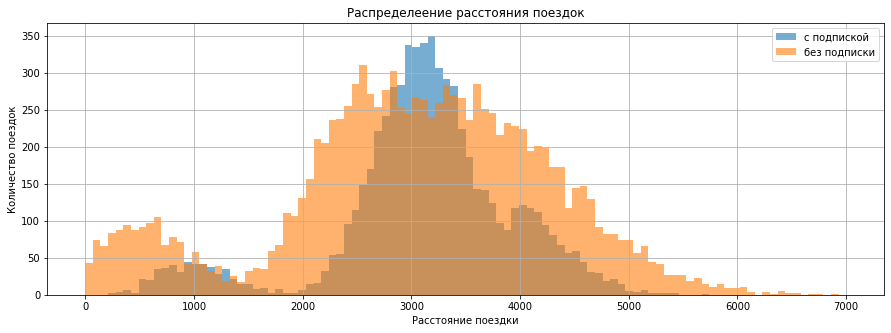

In [26]:
ax = ultra.plot(
    kind='hist',
    y='distance',
    range=(0, 7000),
    figsize=(15,5),
    bins=100,
    alpha=0.6,
    label='с подпиской',
    title = 'Распределеение расстояния поездок'
)
free.plot(
    kind='hist',
    y='distance',
    range=(0, 7000),
    bins=100,
    alpha=0.6,
    label='без подписки',
    ax=ax,
    grid=True,
    legend=True,
);

ax.set_ylabel('Количество поездок');

На графике пользователей без подписки два пика: первый около 500 метров, второй около 3000 метров.  
На графике пользователей с подпиской три пика: первый около 1000 метров, второй около 3000 метров, третий около 4000 метров.

###### Время поездки

In [27]:
ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [28]:
free['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

Время поездки у пользователей с подпиской:  
-среднее (17.4 минуты), медианное (17.3 минуты).  
Время поездки у пользователей без подписки:  
-среднее (18 минут), медианное (1 минуты).   

Средние и медианные значения времени поездок для пользователей с подпиской и без также очень близки.

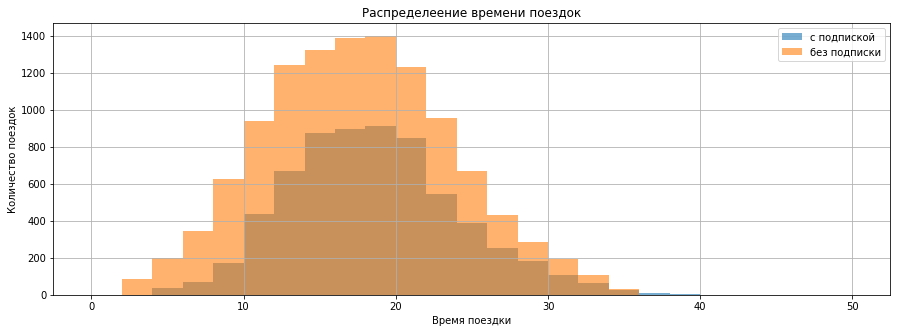

In [29]:
ax = ultra.plot(
    kind='hist',
    y='duration',
    range=(0, 50),
    figsize=(15,5),
    bins=25,
    alpha=0.6,
    label='с подпиской',
    title = 'Распределеение времени поездок'
)
free.plot(
    kind='hist',
    y='duration',
    range=(0, 50),
    bins=25,
    alpha=0.6,
    label='без подписки',
    ax=ax,
    grid=True,
    legend=True,
);
ax.set_xlabel('Время поездки')
ax.set_ylabel('Количество поездок');

Графики распределения тоже практически идентичны и напоминают нормальное распределение с пиком в области 17-18 минут.

#### Шаг 5. Подсчёт выручки

Создадим датафрейм (agg_data), содержащий сумму расстояния, времени поездки (с учетом того, что время поездки огругляется до целого в большую сторону), а также количество поездок и общую выручку для каждого пользователя по месяцам. Также добавим столбцы для дальнейшего расчета помесячной выручки.

In [30]:
data['duration'] = np.ceil(data['duration'])
agg_data = (data.pivot_table(index=['user_id','month'],
                             values=['subscription_type', 'distance', 'duration', 'date',
                                     'minute_price', 'start_ride_price', 'subscription_fee'],
                             aggfunc={'subscription_type': 'first',
                                     'distance': 'sum',
                                     'duration': 'sum',
                                     'date': 'count',
                                     'minute_price': 'first',
                                     'start_ride_price': 'first',
                                     'start_ride_price': 'first',
                                     'subscription_fee': 'first'})
                .rename(columns={'date': 'count'}))

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза: пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки.  
Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки.

In [31]:
alpha = 0.05

results_1 = st.ttest_ind(ultra['duration'], free['duration'], alternative = 'greater')

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве времени поездок')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего времени поездок')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу о равенстве времени поездок


Полученное значение p-value (4.7 / 10**28) явно меньше, чем установленный уровень статистической значимости, поэтому смело отвергаем нулевую гипотезу о равенстве среднего времени поездок, в сторону альтернативной гипотезы о том, что пользователи с подпиской тратят больше времени на поездки.

##### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (оптимальное время)?

Нулевая гипотеза: пользователи с подпиской проезжают в среднем 3130 метров.  
Альтернативная гипотеза: пользователи с подпиской проезжают в среднем более 3130 метров.

In [32]:
optimal_distance = 3130

alpha = 0.05

results_2 = st.ttest_1samp(ultra['distance'], optimal_distance, alternative = 'greater')

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


При значении p-value 0.92 отвергнуть нулевую гипотезу в пользу альтернативной мы не можем, значит скорее всего действительно пользователи с подпиской в среднем проезжают не более оптимального расстояния (3110 метров). 

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Добавим столбец с помесячной выручкой в agg_data.

In [33]:
agg_data['revenue'] = agg_data['minute_price'] * agg_data['duration'] + agg_data['count'] * agg_data['start_ride_price'] + agg_data['subscription_fee']
agg_data.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee subscription_type  revenue  
user_id month                                               
1       1                   199             ultra    451.0  
        4                   199             ultra    241.0  
        8                   199             ultra    475.0  
        10                  199             ultra    391.0  
        11                  199             ultra    535.0

Нулевая гипотеза: помесячная выручка у пользователей с подпиской и пользователей без подписки одинакова.
Альтернативная гипотеза: помесячная выручка у пользователей с подпиской больше, чем у пользователей без подписки.

In [34]:
alpha = 0.05

a = agg_data[agg_data['subscription_type'] == 'ultra']['revenue']
b = agg_data[agg_data['subscription_type'] == 'free']['revenue']

results_3 = st.ttest_ind(a, b, alternative = 'greater')

print('p-значение:', results_3.pvalue)

if (results_3.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


При значении p-value (2.03 / 10**30) явно меньше, чем установленный уровень статистической значимости, значит смело отвергаем нулевую гипотезу в пользу альтернативной. А значит скорее всего действительно помесячная выручка у пользователей с подпиской больше, чем у пользователей без подписки.

#### Шаг 7. Распределения

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [37]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma) 

result = distr.cdf(399500)
print(result)

0.15371708296369768


Вероятность, что уведомление откроют не более 399.5 тыс пользователей, составляет 15.37%.